In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## 1. Loading the data

In [26]:
keras_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train),(x_test, y_test) = keras_mnist.load_data()

4423680/4422102 [==============================] - 5s 1us/step


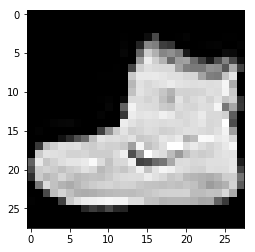

In [27]:
# Data exploration
plt.imshow(x_train[0], cmap='gray')

In [10]:
y_train[0]

5

## 2. Preparing the data

In [16]:
# normalize inputs from 0-255 to 0-1
x_train = x_train / 255
x_test = x_test / 255

## 3. Defining the model

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.nn import relu, softmax

In [13]:
# Defining the model
model = Sequential([
    Flatten(),
    Dense(512, activation=relu),
    Dropout(0.2),
    Dense(10, activation=softmax)
])

## 4. Fit and evaluate the model

In [14]:
# Fitting and evaluating the model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [17]:
model.fit(x_train, y_train, epochs=1)

Epoch 1/1
60000/60000 [==============================] - 68s 1ms/step - loss: 0.2790 - acc: 0.9192


In [18]:
test_loss, test_acc = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 4s 416us/step


In [19]:
test_acc

0.9609

In [20]:
test_loss

0.12353434833958744

## 5. Checking the results

In [21]:
# Check, check, check it out
predictions = model.predict(x_test)

In [22]:
predictions[0]

array([2.8588402e-06, 3.0257517e-08, 8.8074521e-06, 6.4704902e-05,
       4.6040549e-10, 9.9890201e-07, 9.0788654e-11, 9.9990964e-01,
       2.1223802e-07, 1.2630081e-05], dtype=float32)

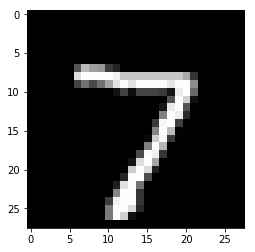

In [25]:
plt.imshow(x_test[0], cmap='gray')

In [23]:
y_test[0]

7

<BarContainer object of 10 artists>

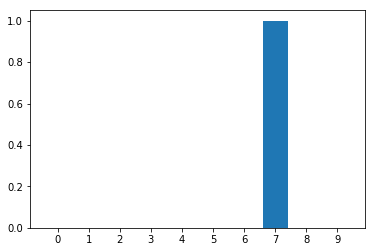

In [24]:
categories = np.arange(len(predictions[0]))
plt.xticks(categories, np.arange(10))
plt.bar(categories, predictions[0])

## 6. Homework

Check out `fashion_mnist`: https://www.tensorflow.org/tutorials/keras/basic_classification